# **Project Name**    - 



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 - Md Saif Ansari**

# **Project Summary -**

**Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company. An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee. For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.**

**Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.**

**Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.**

**Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.**

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Our client, an insurance company, aims to enhance its revenue and optimize its business model by effectively targeting potential customers for vehicle insurance. The company seeks to leverage predictive modeling techniques to identify customers from the previous year's policyholders who are likely to be interested in purchasing vehicle insurance. By analyzing demographic information, vehicle details, policy data, and other relevant factors, the objective is to develop a predictive model that accurately predicts customer interest in vehicle insurance. The successful implementation of this model will enable the company to tailor its communication strategies, optimize marketing efforts, and enhance customer engagement, ultimately leading to increased revenue and improved business performance.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [229]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

sns.set()

### Dataset Loading

In [189]:
# Load Dataset
DATA_FILE = "https://raw.githubusercontent.com/saifghostrider454/Almabetter-Classification_Project/main/TRAIN-HEALTH%20INSURANCE%20CROSS%20SELL%20PREDICTION.csv"


df = pd.read_csv(DATA_FILE)

### Dataset First View

In [190]:
# Dataset First Look

df.sample(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
243202,243203,Male,22,1,8.0,1,< 1 Year,No,57659.0,152.0,13,0
316634,316635,Male,68,1,28.0,0,1-2 Year,No,44504.0,124.0,182,0
350926,350927,Female,22,1,50.0,1,< 1 Year,No,31736.0,152.0,207,0


### Dataset Rows & Columns count

In [191]:
# Dataset Rows & Columns count
print(f"There are {df.shape[0]} Rows and {df.shape[1]} Columns")

There are 381109 Rows and 12 Columns


### Dataset Information

In [192]:
# Dataset Info
desc_df = pd.DataFrame(index=list(df))
desc_df['count'] = df.count()
desc_df['nunique'] = df.nunique()
desc_df['%unique'] = desc_df['nunique'] / len(df) * 100
desc_df['null'] = df.isnull().sum()
desc_df['type'] = df.dtypes
desc_df = desc_df.style.background_gradient(cmap='Greens')
desc_df

,count,nunique,%unique,null,type
id,381109,381109,100.000000,0,int64
Gender,381109,2,0.000525,0,object
Age,381109,66,0.017318,0,int64
Driving_License,381109,2,0.000525,0,int64
Region_Code,381109,53,0.013907,0,float64
Previously_Insured,381109,2,0.000525,0,int64
Vehicle_Age,381109,3,0.000787,0,object
Vehicle_Damage,381109,2,0.000525,0,object
Annual_Premium,381109,48838,12.814707,0,float64
Policy_Sales_Channel,381109,155,0.040671,0,float64


#### Duplicate Values

In [193]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [194]:
# Missing Values/Null Values Count
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

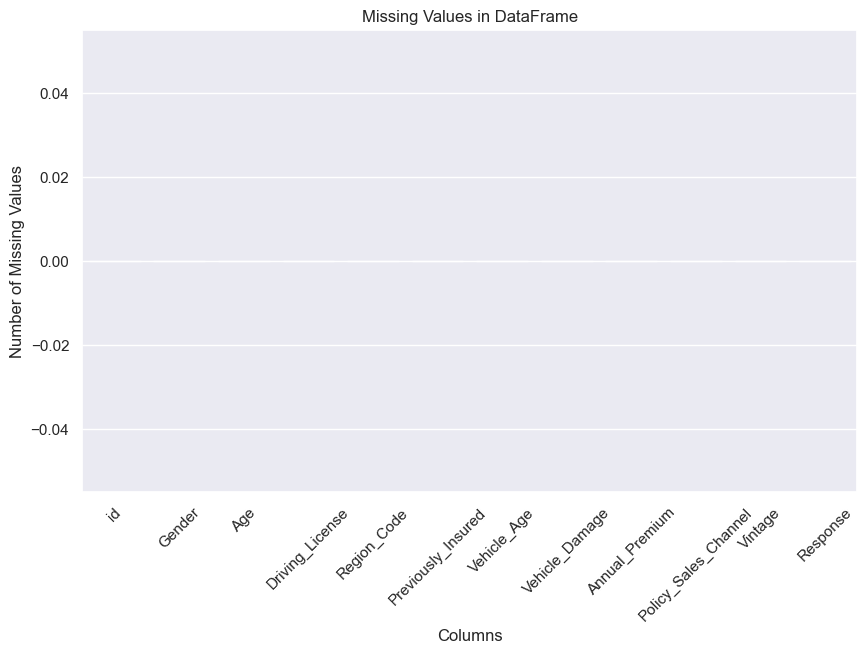

In [195]:
# Visualizing the missing values
missing_values = df.isnull().sum()

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.title('Missing Values in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

### What did you know about your dataset?

**Well, There is no missing, Null or Duplicated Values. This Dataset is almost clear**

## ***2. Understanding Your Variables***

In [196]:
# Dataset Columns
numerical_features = df._get_numeric_data().columns
categorical_features = df.drop(numerical_features, axis=1).columns
numerical_features, categorical_features

(Index(['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
        'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response'],
       dtype='object'),
 Index(['Gender', 'Vehicle_Age', 'Vehicle_Damage'], dtype='object'))

In [197]:
# Dataset Describe
df.describe().T \
.style.bar(subset=['mean'], color=px.colors.qualitative.G10[0]) \
.background_gradient(subset=['std'], cmap='Greens') \
.background_gradient(subset=['50%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
id,381109.000000,190555.000000,110016.836208,1.000000,95278.000000,190555.000000,285832.000000,381109.000000
Age,381109.000000,38.822584,15.511611,20.000000,25.000000,36.000000,49.000000,85.000000
Driving_License,381109.000000,0.997869,0.046110,0.000000,1.000000,1.000000,1.000000,1.000000
Region_Code,381109.000000,26.388807,13.229888,0.000000,15.000000,28.000000,35.000000,52.000000
Previously_Insured,381109.000000,0.458210,0.498251,0.000000,0.000000,0.000000,1.000000,1.000000
Annual_Premium,381109.000000,30564.389581,17213.155057,2630.000000,24405.000000,31669.000000,39400.000000,540165.000000
Policy_Sales_Channel,381109.000000,112.034295,54.203995,1.000000,29.000000,133.000000,152.000000,163.000000
Vintage,381109.000000,154.347397,83.671304,10.000000,82.000000,154.000000,227.000000,299.000000
Response,381109.000000,0.122563,0.327936,0.000000,0.000000,0.000000,0.000000,1.000000


### Variables Description 

The provided data shows the summary statistics for several variables in a dataset. Let's break down each part:

Count: This column indicates the number of non-null values for each variable. In this dataset, there are 381,109 observations for each variable.

Mean: The mean represents the average value of the variable across all observations. For example:

The average age of the policyholders is approximately 38.82 years.
The average value of the annual premium paid by the policyholders is approximately 30,564.39 Rs.
Std (Standard Deviation): This column shows the standard deviation, which measures the dispersion or spread of the values around the mean. A higher standard deviation indicates greater variability in the data. For example:

The standard deviation for age is approximately 15.51 years, indicating some variability in the ages of policyholders.
The standard deviation for the annual premium is approximately 17,213.16 Rs, indicating significant variability in the premium amounts paid by policyholders.
Min: The minimum value observed for each variable in the dataset. For example:

The minimum age of the policyholders is 20 years.
The minimum annual premium paid by any policyholder is 2,630 Rs.
25% (First Quartile), 50% (Median or Second Quartile), 75% (Third Quartile): These columns represent the quartiles of the data distribution. The first quartile (25th percentile) is the value below which 25% of the observations fall, the second quartile (50th percentile or median) is the middle value of the dataset, and the third quartile (75th percentile) is the value below which 75% of the observations fall. For example:

For the age variable, the median age is 36 years, and 25% of the policyholders are younger than 25 years.
For the annual premium variable, 25% of the policyholders pay an annual premium of less than 24,405 Rs, and 75% pay less than 39,400 Rs.
Max: The maximum value observed for each variable in the dataset. For example:

The maximum age of the policyholders is 85 years.
The maximum annual premium paid by any policyholder is 540,165 Rs.
Variable Names: Each row corresponds to a variable in the dataset, such as 'id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', and 'Vintage'. These are the features or attributes of the dataset that describe the policyholders and their insurance policies.

Overall, these summary statistics provide valuable insights into the distribution, central tendency, and variability of each variable in the dataset, aiding in data analysis and interpretation.

### Check Unique Values for each variable.

In [198]:
# Check Unique Values for each variable.

desc_df = pd.DataFrame(index=list(df))
desc_df['nunique'] = df.nunique()
desc_df['%unique'] = desc_df['nunique'] / len(df) * 100
desc_df = desc_df.style.background_gradient(cmap='Greens')
# desc_train = pd.concat([desc_train, train.describe().T], axis=1)
desc_df

,nunique,%unique
id,381109,100.000000
Gender,2,0.000525
Age,66,0.017318
Driving_License,2,0.000525
Region_Code,53,0.013907
Previously_Insured,2,0.000525
Vehicle_Age,3,0.000787
Vehicle_Damage,2,0.000525
Annual_Premium,48838,12.814707
Policy_Sales_Channel,155,0.040671


## 3. ***Data Wrangling***

### Data Wrangling Code

In [199]:
# Write your code to make your dataset analysis ready.

### Handling Numeric Features

#### Outliers

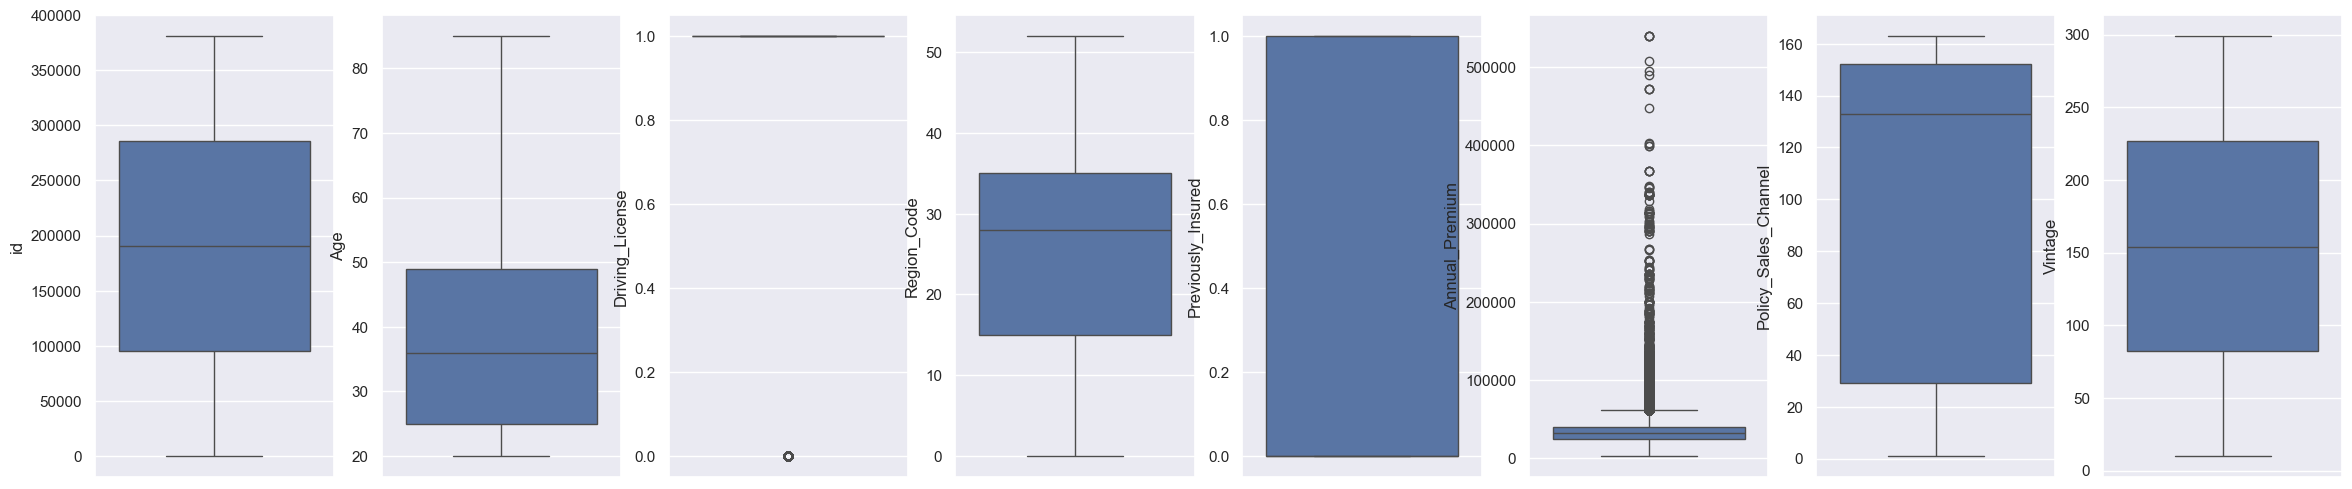

In [200]:
length = len(numerical_features[:-1])

fig, ax = plt.subplots(1, length, figsize=[29, 6])

for i in range(length):
    sns.boxplot(df[numerical_features[i]], ax=ax[i])


plt.show()

In [201]:
class HandlingOutliers:
    """
    A class to handle outliers in a DataFrame.
    
    Attributes:
        input_df (DataFrame): The input DataFrame.
        output_df (DataFrame): The modified DataFrame with outliers handled.
    """
    
    def __init__(self, input_df):
        """
        Initializes the HandlingOutliers object.
        
        Parameters:
            input_df (DataFrame): The input DataFrame.
        """
        self.output_df = input_df.copy()
        
    
    def fit(self, columns):
        """
        Fits the HandlingOutliers object to the data.
        
        Parameters:
            columns (list): A list of columns to be processed.
        
        Returns:
            HandlingOutliers: The fitted HandlingOutliers object.
        """
        return self
    
    def transform(self, columns):
        """
        Transforms the specified columns to handle outliers.
        
        Parameters:
            columns (list): A list of columns to be processed.
        
        Returns:
            DataFrame: The modified DataFrame with outliers handled.
        """
        for col in columns:
            Q1 = self.output_df[col].quantile(0.25)
            Q3 = self.output_df[col].quantile(0.75)
            
            IQR = Q3 - Q1
            
            maximum_threshold = Q3 + 1.5 * IQR
            minimum_threshold = Q1 - 1.5 * IQR
            
            self.output_df[col] = np.where(self.output_df[col] > maximum_threshold, maximum_threshold,
                                           np.where(self.output_df[col] < minimum_threshold, minimum_threshold,
                                                    self.output_df[col]))
        
        return self.output_df

In [202]:
class RemovingOutliers:
    """
    A class to remove outliers from specified columns in a DataFrame.
    
    Attributes:
        input_df (DataFrame): The input DataFrame.
        output_df (DataFrame): The modified DataFrame with outliers removed.
    """
    
    def __init__(self, input_df):
        """
        Initializes the RemovingOutliers object.
        
        Parameters:
            input_df (DataFrame): The input DataFrame.
        """
        self.output_df = input_df.copy()
        
    def fit(self, columns):
        """
        Fits the RemovingOutliers object to the data.
        
        Parameters:
            columns (list): A list of columns to be processed.
        
        Returns:
            RemovingOutliers: The fitted RemovingOutliers object.
        """
        return self
    
    def transform(self, columns):
        """
        Transforms the specified columns to remove outliers.
        
        Parameters:
            columns (list): A list of columns to be processed.
        
        Returns:
            DataFrame: The modified DataFrame with outliers removed.
        """
        for col in columns:
            Q1 = self.output_df[col].quantile(0.25)
            Q3 = self.output_df[col].quantile(0.75)
            
            IQR = Q3 - Q1
            
            maximum_threshold = Q3 + 1.5 * IQR
            minimum_threshold = Q1 - 1.5 * IQR
            
            # Remove outliers
            self.output_df = self.output_df[~((self.output_df[col] > maximum_threshold) | (self.output_df[col] < minimum_threshold))]
            
        return self.output_df

In [203]:
ho = HandlingOutliers(df)

df = ho.transform(numerical_features[:-1])

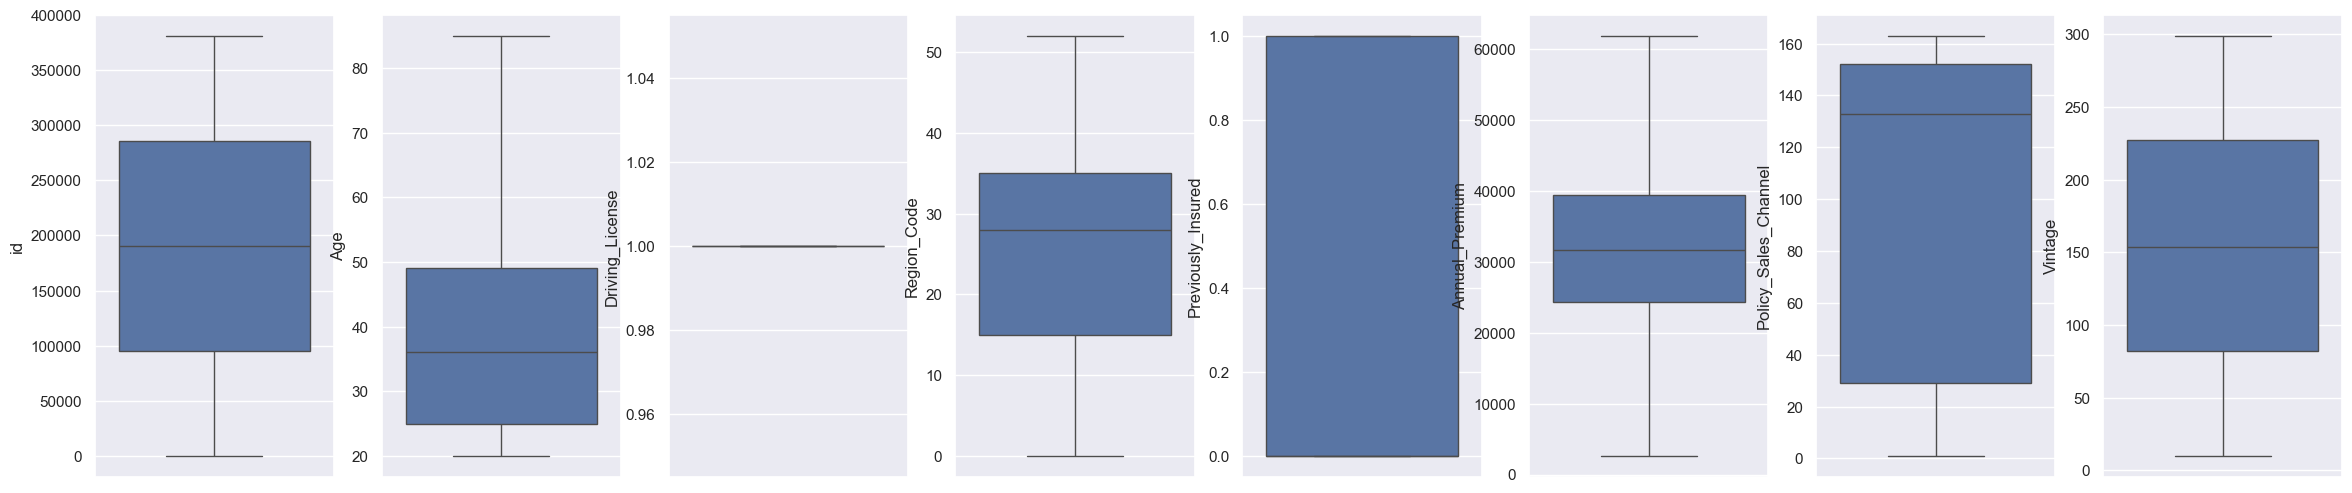

In [204]:
length = len(numerical_features[:-1])

fig, ax = plt.subplots(1, length, figsize=[29, 6])

for i in range(length):
    sns.boxplot(df[numerical_features[i]], ax=ax[i])


plt.show()

In [205]:
df.Region_Code = df.Region_Code.astype('int')

### What all manipulations have you done and insights you found?

**In Data Wrangling We Found Outliers So i Handled it using IQR method**

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

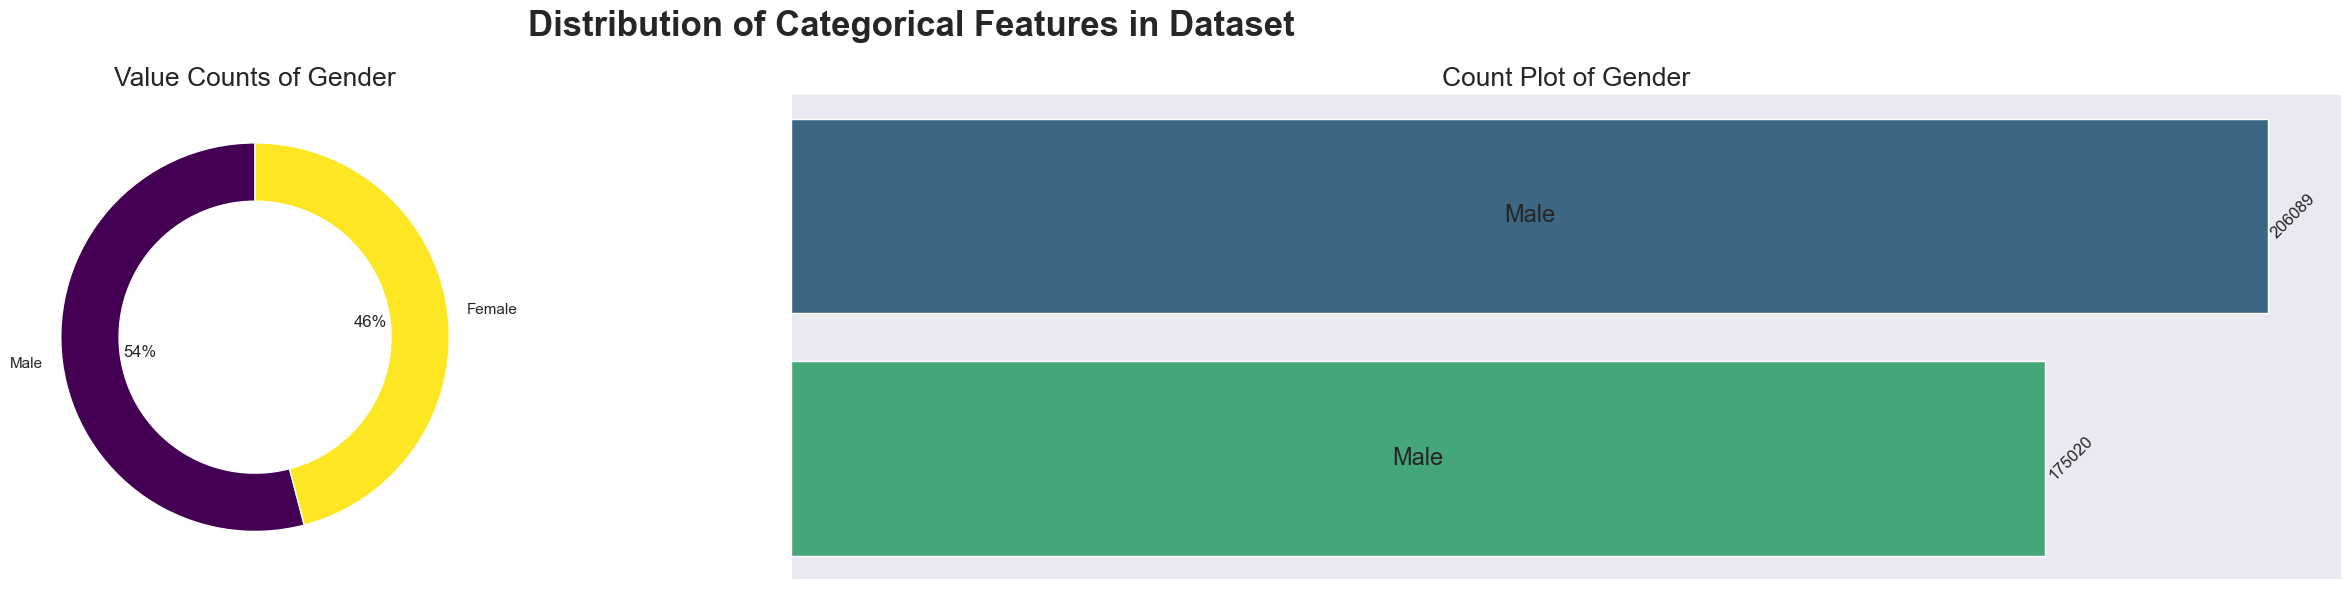

In [91]:
# Chart - 1 visualization code


fig, ax = plt.subplots(1, 2, figsize=(29, 6))

# Plot value counts with donut chart
sizes = df['Gender'].value_counts().values
labels = df['Gender'].value_counts().index
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
ax[0].pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
ax[0].add_artist(plt.Circle((0, 0), 0.2, color='white'))
ax[0].set_title('Value Counts of Gender', fontsize=19)

# Plot count plot with seaborn
sns.countplot(data=df, y='Gender', ax=ax[1], palette='viridis', order=df['Gender'].value_counts().index)
ax[1].set_title('Count Plot of Gender', fontsize=19)
ax[1].set_xlabel('Count in Train', fontsize=12)
ax[1].set_ylabel('Gender', fontsize=12)

# Add count values inside the bars with rotation and shift
for p in ax[1].patches:
    width = p.get_width()
    ax[1].text(width + 0.05, p.get_y() + p.get_height() / 2., f'{width:.0f}', ha='left', va='center', rotation=45)

# Add gender labels inside the bars
for i, patch in enumerate(ax[1].patches):
    bar_width = patch.get_width()
    bar_center = patch.get_x() + bar_width / 2
    ax[1].text(bar_center, patch.get_y() + patch.get_height() / 2, df['Gender'].iloc[i], ha='center', va='center', fontsize=17)

# Removing the x and y axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Adjust layout and titles
fig.suptitle('Distribution of Categorical Features in Dataset', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

**The specific chart chosen for the distribution of categorical features in the dataset consists of two subplots:**

**Donut Chart (Pie Chart with a Hole): This chart is selected to visualize the relative proportions of different genders in the dataset. The donut chart provides a clear representation of the distribution of gender categories, allowing viewers to easily compare the sizes of each category. By including percentage labels and a white circle in the center, the chart remains informative and visually appealing.**

**Count Plot: This type of plot is commonly used to display the count of each category in a categorical variable. In this case, the count plot is suitable for showing the number of occurrences of each gender category. The y-axis represents the gender categories, while the length of each bar corresponds to the count of occurrences. Text annotations inside each bar provide additional information about the exact count for each category.**

**Combining these two plots side by side allows for a comprehensive understanding of the gender distribution in the dataset. The donut chart offers an overview of proportions, while the count plot provides detailed counts for each category. Together, they provide a well-rounded visualization of the categorical feature.**

##### 2. What is/are the insight(s) found from the chart?

**Gender Distribution: The dataset contains more males than females. Males account for 54% and females account for 46% of the dataset, as shown in the pie chart.**

**Count Plot: The bar graphs visually represent this distribution, with a longer bar for males indicating a higher count, and a shorter bar for females indicating a lower count.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**1. Product Development: Understanding the gender distribution can help in tailoring insurance products and services to meet the specific needs of both genders. For instance, if the dataset shows a higher proportion of males, the company might consider offering more products that cater to the needs and preferences of males.**

**2. Marketing and Sales Strategy: The insights can guide marketing and sales strategies. For example, if there are more males in the dataset, marketing campaigns can be designed to appeal more to males, potentially increasing engagement and sales.**

**3. Risk Assessment: Insurance companies often use demographic data like gender for risk assessment and premium calculations. Knowing the gender distribution can help in more accurate risk profiling.**

**4. Customer Service: Understanding the customer base can help improve customer service and satisfaction. For example, communication strategies can be adjusted based on the preferences of the dominant gender in the dataset.**

#### Chart - 2

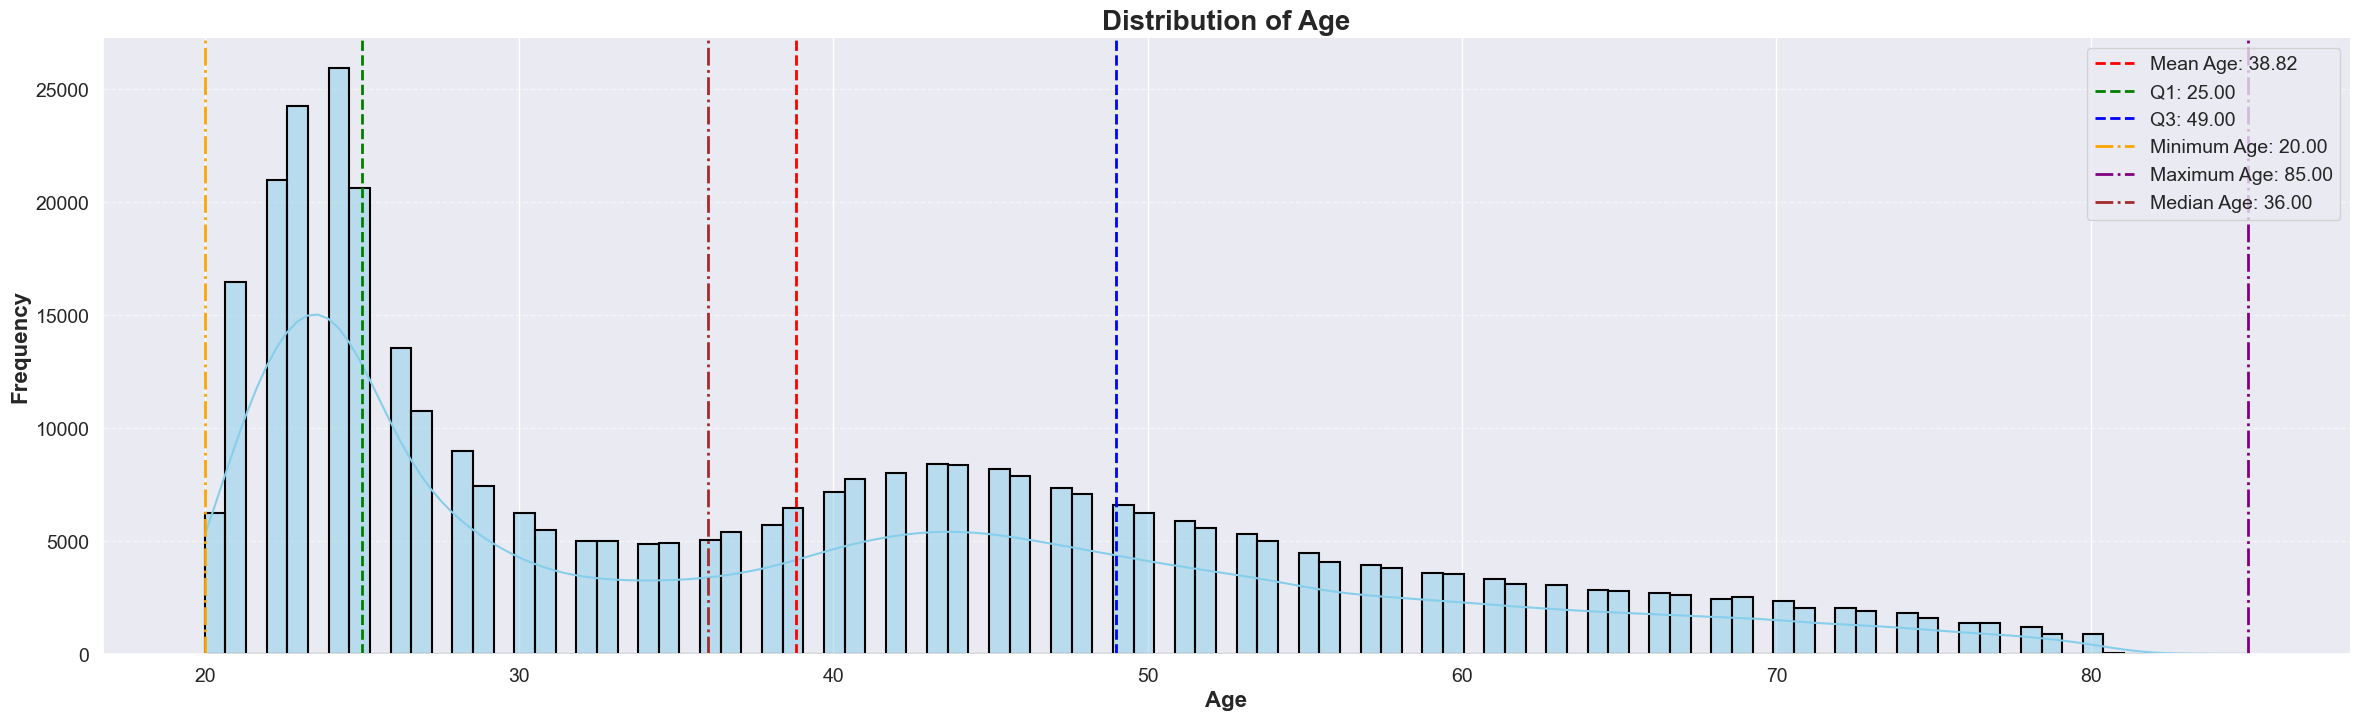

In [118]:
# Chart - 2 visualization code

# Set style
sns.set_style("darkgrid")

# Create histogram
plt.figure(figsize=[29, 8])
sns.histplot(df.Age, kde=True, color='skyblue', edgecolor='black', linewidth=1.5)

# Add labels and title
plt.xlabel('Age', fontsize=16, fontweight='bold')
plt.ylabel('Frequency', fontsize=16, fontweight='bold')
plt.title('Distribution of Age', fontsize=20, fontweight='bold')

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Customize ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add annotations
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='--', linewidth=2, label=f'Mean Age: {mean_age:.2f}')

# Calculate IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Plot IQR lines
plt.axvline(Q1, color='green', linestyle='--', linewidth=2, label=f'Q1: {Q1:.2f}')
plt.axvline(Q3, color='blue', linestyle='--', linewidth=2, label=f'Q3: {Q3:.2f}')

# Add lines for minimum, maximum, and median
min_age = df['Age'].min()
max_age = df['Age'].max()
median_age = df['Age'].median()

plt.axvline(min_age, color='orange', linestyle='-.', linewidth=2, label=f'Minimum Age: {min_age:.2f}')
plt.axvline(max_age, color='purple', linestyle='-.', linewidth=2, label=f'Maximum Age: {max_age:.2f}')
plt.axvline(median_age, color='brown', linestyle='-.', linewidth=2, label=f'Median Age: {median_age:.2f}')

# Add legend and adjust position
plt.legend(fontsize=14, loc='best')

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

**This chart effectively communicates the distribution of ages in the dataset and provides useful insights into its statistical characteristics.**

##### 2. What is/are the insight(s) found from the chart?

**Age Distribution: The majority of insured individuals are between the ages of 20 and 30. There is a significant drop in frequency as age increases, with very few insured individuals above the age of 60.**

**Statistical Measures: The mean age is 38.82, median age is 36.00, minimum age is 20.00, Q1 (25th percentile) is at age 25.00, and Q3 (75th percentile) is at age 49.00.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**These insights can help the company understand its customer base better, tailor its products and services to meet the needs of different age groups, and make informed business decisions. However, it’s important to consider other factors and demographics in the dataset for a more comprehensive understanding.**

#### Chart - 3

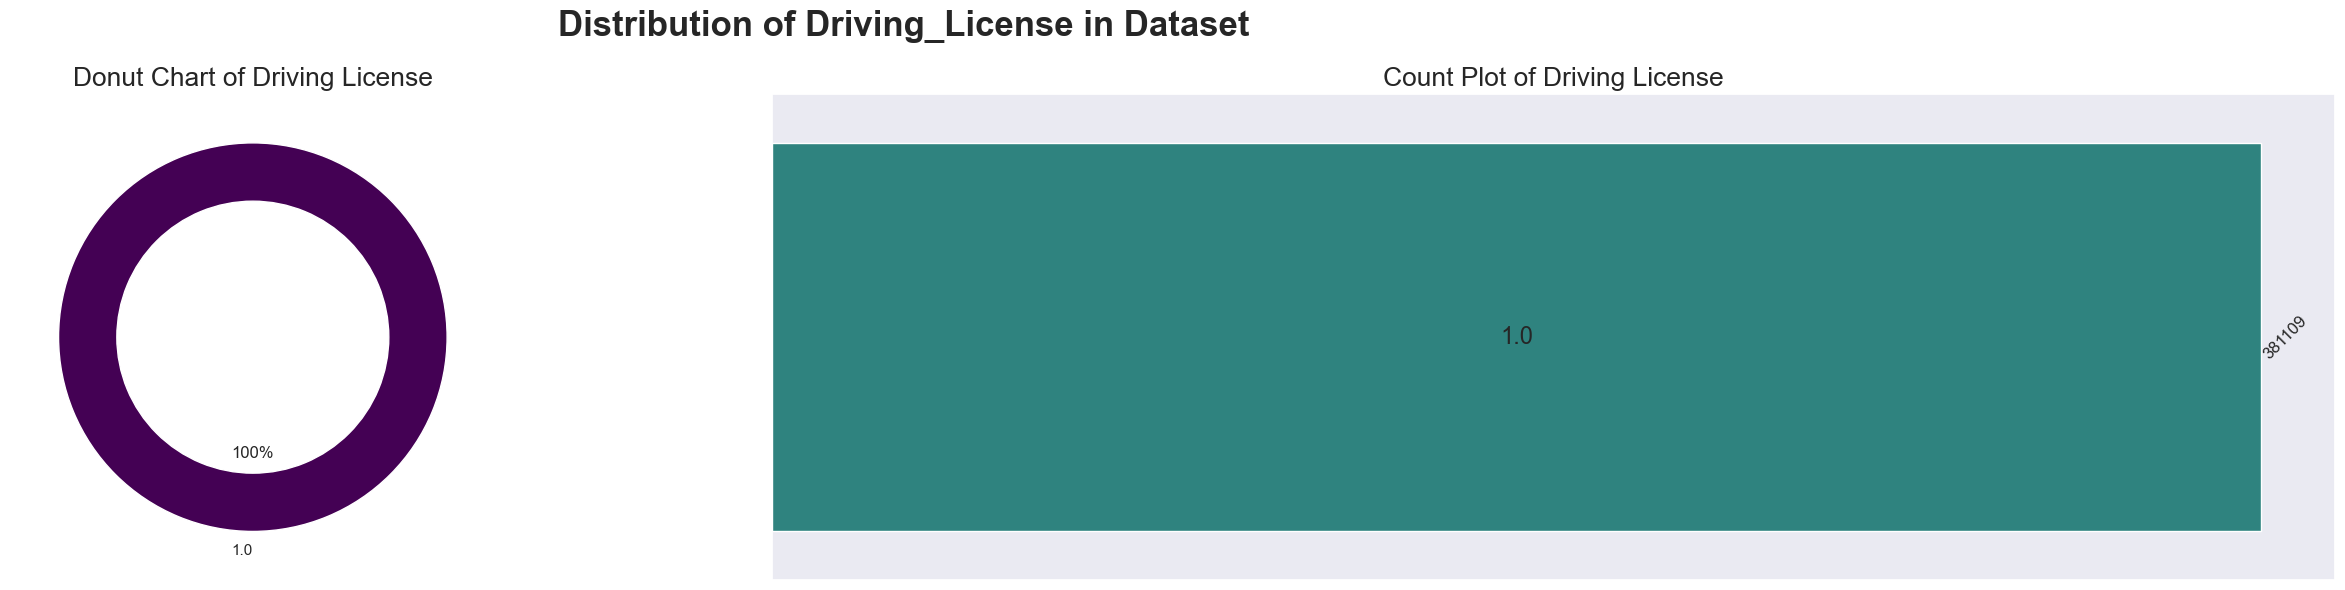

In [243]:
# Chart - 3 visualization code

fig, ax = plt.subplots(1, 2, figsize=(29, 6))

# Plot value counts with donut chart
sizes = df['Driving_License'].value_counts().values
labels = df['Driving_License'].value_counts().index
colors = plt.cm.viridis(np.linspace(0, 1, len(labels)))
ax[0].pie(sizes, labels=labels, colors=colors, autopct='%1.f%%', startangle=90, wedgeprops=dict(width=0.3, edgecolor='w'))
ax[0].add_artist(plt.Circle((0, 0), 0.2, color='white'))
ax[0].set_title('Donut Chart of Driving License', fontsize=19)

# Plot count plot with seaborn
sns.countplot(data=df, y='Driving_License', ax=ax[1], palette='viridis', order=df['Driving_License'].value_counts().index)
ax[1].set_title('Count Plot of Driving License', fontsize=19)
ax[1].set_xlabel('Count in dataframe', fontsize=12)
ax[1].set_ylabel('Driving License', fontsize=12)

# Add count values inside the bars with rotation and shift
for p in ax[1].patches:
    width = p.get_width()
    ax[1].text(width + 0.05, p.get_y() + p.get_height() / 2., f'{width:.0f}', ha='left', va='center', rotation=45)

# Add gender labels inside the bars
for i, patch in enumerate(ax[1].patches):
    bar_width = patch.get_width()
    bar_center = patch.get_x() + bar_width / 2
    ax[1].text(bar_center, patch.get_y() + patch.get_height() / 2, df['Driving_License'].iloc[i], ha='center', va='center', fontsize=17)

# Removing the x and y axes
plt.gca().axes.get_xaxis().set_visible(False)
plt.gca().axes.get_yaxis().set_visible(False)

# Adjust layout and titles
fig.suptitle('Distribution of Driving_License in Dataset', fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

In [242]:
df.Response.unique()

array([1, 0], dtype=int64)

##### 1. Why did you pick the specific chart?

**Combining these two plots side by side allows for a comprehensive understanding of the Driving License distribution in the dataset. The donut chart offers an overview of proportions, while the count plot provides detailed counts for each category. Together, they provide a well-rounded visualization of the categorical feature.**

##### 2. What is/are the insight(s) found from the chart?

**100% of Customers has Driving License**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**While the specific insight about driving licenses may not directly impact the insurance company's operations in this context, it contributes to a broader understanding of the customer base and can inform strategic decisions that ultimately enhance customer satisfaction and drive business growth.**

#### Chart - 4

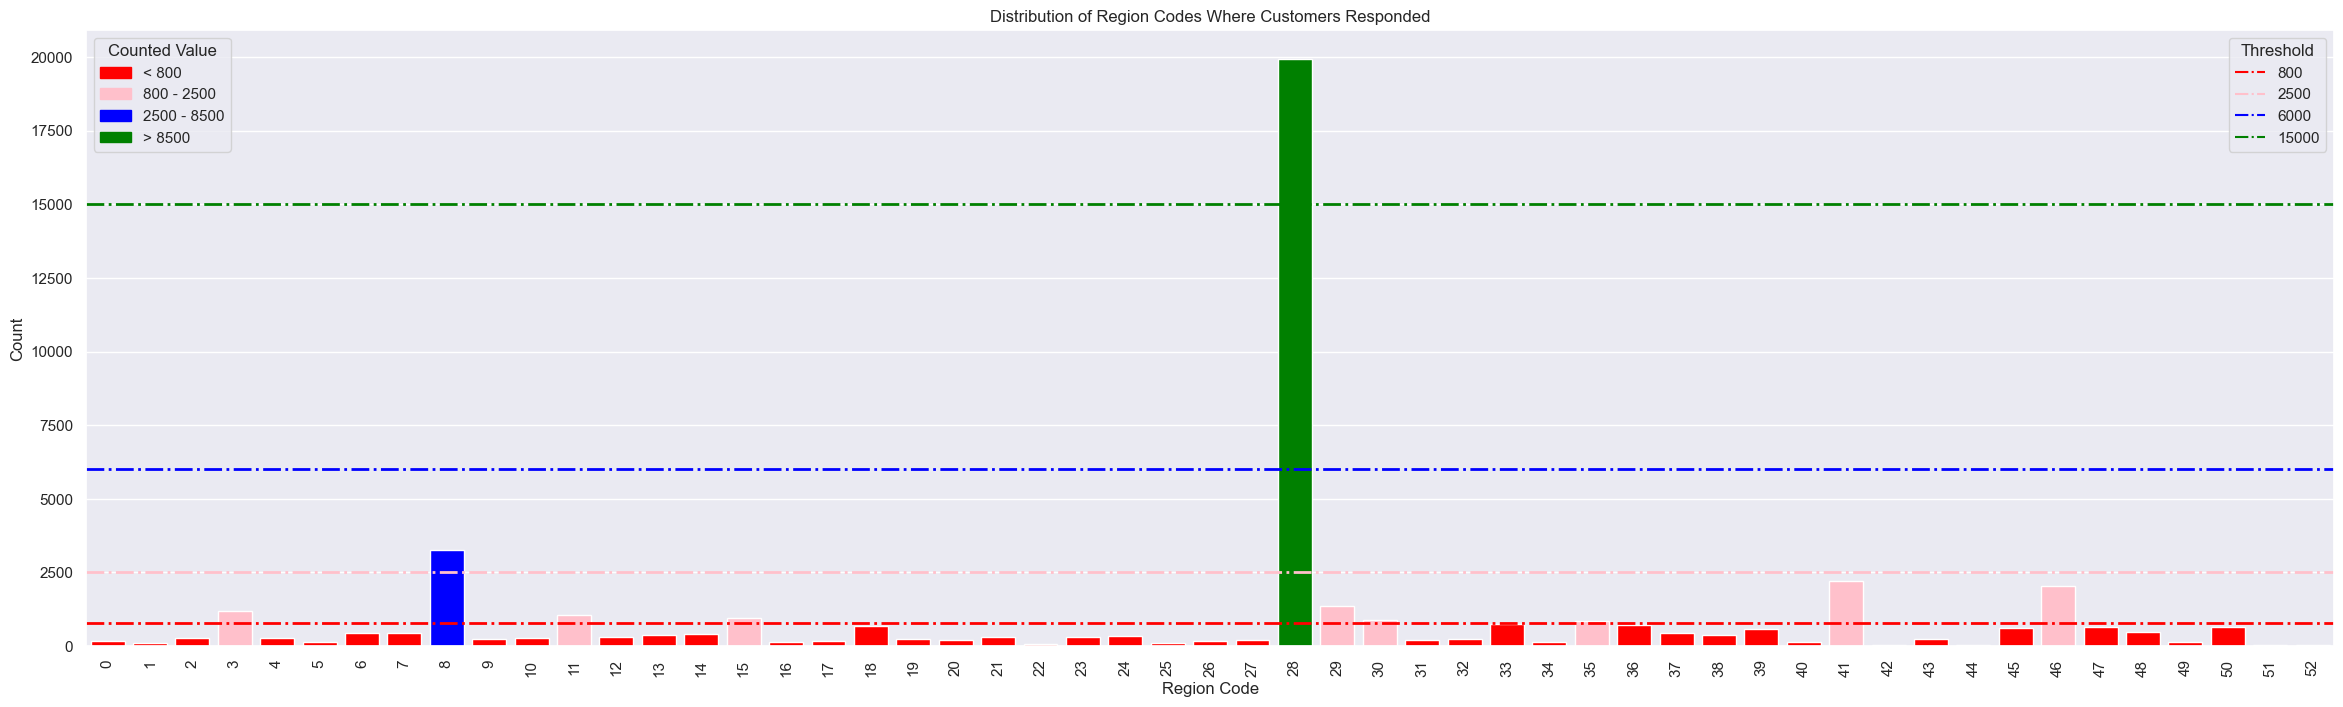

In [239]:
ndf = df[df.Response == 1]
plt.figure(figsize=(29, 8))
ax = sns.countplot(data=ndf, x='Region_Code')

# Highlight bars where count falls within specific ranges
for patch in ax.patches:
    if patch.get_height() < 800:
        patch.set_facecolor('red')  
    elif 800 <= patch.get_height() < 2500:
        patch.set_facecolor('pink')  
    elif 2500 <= patch.get_height() < 8500:
        patch.set_facecolor('blue')  
    else:
        patch.set_facecolor('green')

# Draw horizontal lines at specified count levels
for y, color, label in [(800, 'red', '800'), (2500, 'pink', '2500'), (6000, 'blue', '6000'), (15000, 'green', '15000')]:
    plt.axhline(y=y, color=color, linestyle='-.', linewidth=2, label=label)

# Define custom legend labels and handles for both bar and line legends
bar_legend_labels = ['< 800', '800 - 2500', '2500 - 8500', '> 8500']
bar_legend_colors = ['red', 'pink', 'blue', 'green']
bar_legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(bar_legend_colors, bar_legend_labels)]

line_legend_patches = []
line_legend_labels = []
for y, color, label in [(800, 'red', '800'), (2500, 'pink', '2500'), (6000, 'blue', '6000'), (15000, 'green', '15000')]:
    line_legend_patches.append(mpatches.Patch(color=color, linestyle='-.', label=label))
    line_legend_labels.append(label)

plt.title('Distribution of Region Codes Where Customers Responded')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Define custom legend labels and handles for bar legends
bar_legend_labels = ['< 800', '800 - 2500', '2500 - 8500', '> 8500']
bar_legend_colors = ['red', 'pink', 'blue', 'green']
bar_legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(bar_legend_colors, bar_legend_labels)]

# Define custom legend labels and handles for line legends
line_legend_labels = ['800', '2500', '6000', '15000']
line_legend_colors = ['red', 'pink', 'blue', 'green']
line_legend_handles = [mlines.Line2D([], [], color=color, linestyle='-.', label=label) for color, label in zip(line_legend_colors, line_legend_labels)]

# Add separate legends for bars and lines
legend1 = plt.legend(handles=bar_legend_patches, title='Counted Value', loc='upper left')
ax = plt.gca().add_artist(legend1)
plt.legend(handles=line_legend_handles, title='Threshold', loc='upper right')

plt.show()


##### 1. Why did you pick the specific chart?

**The specific chart, a countplot, is suitable for visualizing the distribution of categorical data, such as the 'Region_Code' in your dataset. It efficiently displays the count of each category, making it easy to identify the frequency of different region codes. Additionally, you can easily customize this plot to highlight specific counts or ranges of counts, as demonstrated in the provided code.**

##### 2. What is/are the insight(s) found from the chart?

**Region Code 28: This region has a significantly higher number of customer responses compared to other regions. The count surpasses all set thresholds, indicating a high level of engagement or interest in health insurance from this region.**

**Other Regions: Most other regions have a low response count, falling below the lowest threshold line (red line at 2500).**

**Threshold Lines: The chart includes four threshold lines at counted values of 2500 (red), 5000 (blue), 8000 (purple), and 15000 (green). These thresholds could be benchmarks for comparing customer responses across different regions.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**This data could be useful for understanding customer distribution and strategizing marketing efforts. However, further analysis would be needed to draw more detailed conclusions.**

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***